# 1. Utilizando o python para lidar com datasets

Neste cenário, iremos simular a criação de um dataset com várias tabelas e utilizar o python para referenciar e manipular informações através do dataset.

## 1.1 Simulando um dataset

Para o nosso caso de uso, utilizaremos a biblioteca [Faker](https://github.com/joke2k/faker). Para instalar a biblioteca, basta criar uma célula e executar o comando `pip install faker`. A biblioteca será instalada no ambiente do google colab. A biblioteca Faker é utilizada para gerar dados fictícios em diversas línguas diferentes. A primeira etapa da atividade envolve utilizar a biblioteca para gerar um conjunto de tabelas de dados com as especificações abaixo. Pede-se que os dados sejam gerados com a biblioteca (ver documentação extendida) e, posteriormente sejam criados dataframes para cada uma das situações. 

O dataset vai representar um conjunto de tabelas de bases de dados de clientes em uma livraria. Pretende-se simular o seguinte dataset:
* Clientes (250 entradas): <id_cliente, nome_cliente, idade_cliente>
* Vendedores (5 entradas): <id_vendedor, nome_vendedor>
* Categoria (5 entradas): <id_categoria, nome_categoria>
* Livros (50 entradas): <id_livro, nome_livro, id_categoria, valor_livro>
* Vendas (1000 entradas): <id_cliente, id_vendedor, id_livro, quantidade_livro>

Observações:
* Os identificadores de cliente, vendedor e livro devem ser números únicos. Para facilitar, use id's sequenciais;
* As idades de clientes devem ser números aleatórios entre 15 e 80;
* As quantidades de livros devem estar no intervalo `[1, 10]`;
* Os valores de livro devem estar no intervalo `[10, 500]`;
* O e-mail de um cliente deve ser o nome completo dele, em letras minúsculas, separado por `_`. Suponha que o único provedor de e-mails seja o gmail, para o nosso dataset. Por exemplo, `Cassia Almeida` teria o e-mail `cassia_almeida@gmail.com`.

DICAS:
* Para realizar a importação da biblioteca utilize `from faker import Faker`, após ter instalado a mesma no Google Colab;
* Para replicar os valores, de forma que cada vez que você rode inicice novamente o notebook, a mesma sequência de valores aleatórios apareça, você deve determinar o seed de geração de valores da biblioteca. Para isso, utilize `Faker.seed(10289)`;
* `fake = Faker(locale='en_US')` cria uma instância do Faker alinhado com dados de um determinado local. Vamos gerar os dados em inglês (O Faker só gera nomes em português bem. Sentenças e textos não. Outros caminhos, envolvendo por exemplo a biblioteca `nltk` não são tão simples para gerar sentenças e frases);
* Para gerar dados únicos, há o método `unique`, que vai ser utilizado como `fake.unique.<...>` para garantir que algo não se repita;
* Para gerar nomes dos livros, ou outros nomes, você pode usar os métodos `fake.word`, `fake.text` ou `fake.sentence`. Para controlar a quantidade de caracteres do texto com o `text`, utilize o parâmetro `max_nb_chars`. Já o `sentence` tem outro parâmetro chamado `nb_words`, que seleciona quantas palavras irão compor a sentença;
* Para gerar números inteiros aleatórios, você pode usar o método `numpy.random.randint`;
* Para gerar números reais aleatórios, você pode usar métodos a estilo do `numpy.random.uniform`. Não é o único tipo de método de amostragem de distribuições (tópico que veremos no futuro), mas é suficiente para a simulação desse trabalho.
* Ao gerar a tabela de Vendas, você terá de selecionar entre combinações únicas de Livros vendidos a Clientes por Vendedores. Para sortear os elementos dessa tabela, primeiro você deve gerar uma combinação de todas essa possíveis interações. Para isso, da biblioteca `itertools` utilize o método `product`. A partir disso, selecione aleatoriamente um subconjunto de casos para simular vendas diferentes. Para esse subconjunto, gere aleatoriamente as quantidades de livros que foram vendidos em cada venda;
* Para selecionar elementos tendo por base outra coluna já gerada, você pode usar método `numpy.random.choice`. Todavia, esse método só seleciona elementos com uma dimensão. Uma forma de selecionar elementros de múltiplas dimensões (como será o caso da tabela Vendas), você pode usar o `numpy.random.shuffle`, que embaralha automaticamente uma lista de elementos ou, também, o método `numpy.random.permutation`. Nesses últimos casos, tendo o vetor embaralhado, basta pegar os primeiros `n` elementos, que serão `n` elementos aleatórios;

Olhe exemplos de documentação na internet para compreender como utilizar o método. Para esta primeira etapa, gere um dataset com as especificações mostradas. Ao fim, exiba a head de cada um dos dataframes criados.

# Células de código

In [1]:
pip install faker

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from faker import Faker

In [3]:
Faker.seed(10289)

## Tabela Clientes

In [4]:
fake = Faker(locale='en_US')

In [5]:
import random as rd

In [6]:
client_id = []
name_client = []
age_client = []
for i in range(0,250):
    number = fake.unique.random_int(min=1,max=999)
    client_id.append(number)
    name_client.append(fake.unique.name())
    age = fake.random_int(min=15,max=80)
    age_client.append(age)

In [7]:
import pandas as pd

clientes = {"id_cliente":client_id,
            "nome_cliente":name_client,
            "idade_cliente":age_client}

clientes_df = pd.DataFrame(clientes)
clientes_df

,id_cliente,nome_cliente,idade_cliente
0,55,David Edwards,56
1,157,Janice Turner,33
2,134,Jaime Coleman,15
3,881,Kevin Barton,18
4,621,Ashley Gomez,74
...,...,...,...
245,121,Amber Gonzalez,69
246,935,Matthew Holden,22
247,884,Kathy Knight,55
248,127,Wendy Smith,77


## Tabela Vendedores

In [8]:
vendor_id = []
vendor_name = []
for i in range(0,5):
    idn = fake.unique.random_int(min=1,max=25)
    vendor_id.append(idn)
    vendor_name.append(fake.unique.name())

In [9]:
vendedores = {"id_vendedor":vendor_id,
              "nome_vendedor":vendor_name}

vendedores_df = pd.DataFrame(vendedores)
vendedores_df

,id_vendedor,nome_vendedor
0,21,Gregory Bartlett
1,18,James Gould
2,2,Carly Leonard
3,11,Alyssa Gilbert
4,5,Kyle Massey


## Tabela Categorias

In [10]:
id_cat = []
cat_name = ["Romance","Terror","Ficção Científica","Infantil","Drama"]
for i in range(0,5):
    id_cat.append(fake.unique.random_int(min=1,max=10))

In [11]:
categoria = {"id_categoria":id_cat,
             "nome_categoria":cat_name}

categoria_df = pd.DataFrame(categoria)
categoria_df

,id_categoria,nome_categoria
0,10,Romance
1,2,Terror
2,7,Ficção Científica
3,5,Infantil
4,6,Drama


## Tabela Livros

In [12]:
book_id = []
book_name = []
cat_id = []
book_price = []
for i in range(0,50):
    book_id.append(fake.unique.random_int(min=1,max=200))
    book_name.append(fake.sentence(nb_words=5))
    number = id_cat[rd.randint(0,4)]
    cat_id.append(number)
    book_price.append(fake.unique.random_int(min=10,max=500))

In [13]:
livros = {"id_livro":book_id,
          "nome_livro":book_name,
          "id_categoria":cat_id,
          "valor_livro":book_price}

livros_df = pd.DataFrame(livros)
livros_df

,id_livro,nome_livro,id_categoria,valor_livro
0,176,Look begin accept parent.,7,354
1,126,You occur understand two young.,7,23
2,68,Institution left phone.,2,197
3,197,Green hold another.,5,463
4,9,Reality purpose ground century course apply.,5,16
5,58,All suggest note.,6,106
6,128,To try produce what or institution.,2,417
7,88,Rise whom possible east painting.,5,493
8,155,Force fire style really maintain.,2,226
9,160,Whose somebody high each hard.,5,363


## Tabela Vendas

In [14]:
sales_clients = []
sales_vendor_id = []
sales_book_id = []
amount_book = []
for i in range(0,1000):
    sales_clients.append(list(clientes_df["id_cliente"])[rd.randint(0,249)])
    sales_vendor_id.append(list(vendedores_df["id_vendedor"])[rd.randint(0,4)])
    sales_book_id.append(list(livros_df["id_livro"])[rd.randint(0,49)])
    amount_book.append(rd.randint(1,10))

In [15]:
vendas = {"id_cliente":sales_clients,
          "id_vendedor":sales_vendor_id,
          "id_livro":sales_book_id,
          "quantidade_livro":amount_book}

vendas_df = pd.DataFrame(vendas)
vendas_df

,id_cliente,id_vendedor,id_livro,quantidade_livro
0,494,2,183,6
1,431,2,137,2
2,716,11,196,6
3,808,18,9,7
4,851,2,14,3
...,...,...,...,...
995,493,21,137,1
996,537,21,71,6
997,632,5,69,8
998,876,5,137,5


## 1.2 Manipulando múltiplos dataframes em paralelo

Tendo um dataset gerado para o cenário atual, é possível, com `numpy`, `pandas`, dentre outras bibliotecas, incluindo o próprio python puro, realizar busca e manipulação dos dados. Para exercitar esses conceitos, solicita-se que você gere, utilizando a interface do pandas. um conjunto de novas tabelas com as seguintes informações:
1. Uma nova tabela de Livros, onde, ao invés de haver um código para a categoria, há uma coluna com o nome da categoria;
1. Uma nova tabela de Vendas, que relaciona o nome do Vendedor, o nome do Cliente e o nome do Livro, além da quantidade vendida.

# Células de código

## Tabela livros

In [16]:
copy_books = livros_df
copy_books

,id_livro,nome_livro,id_categoria,valor_livro
0,176,Look begin accept parent.,7,354
1,126,You occur understand two young.,7,23
2,68,Institution left phone.,2,197
3,197,Green hold another.,5,463
4,9,Reality purpose ground century course apply.,5,16
5,58,All suggest note.,6,106
6,128,To try produce what or institution.,2,417
7,88,Rise whom possible east painting.,5,493
8,155,Force fire style really maintain.,2,226
9,160,Whose somebody high each hard.,5,363


In [17]:
copy_books = copy_books.merge(categoria_df)
copy_books

,id_livro,nome_livro,id_categoria,valor_livro,nome_categoria
0,176,Look begin accept parent.,7,354,Ficção Científica
1,126,You occur understand two young.,7,23,Ficção Científica
2,71,Simple land no wrong.,7,414,Ficção Científica
3,152,Charge eight interest office north product.,7,350,Ficção Científica
4,115,Along bill yeah first newspaper.,7,371,Ficção Científica
5,68,Institution left phone.,2,197,Terror
6,128,To try produce what or institution.,2,417,Terror
7,155,Force fire style really maintain.,2,226,Terror
8,137,On me much store.,2,408,Terror
9,97,Although in trade network less provide factor.,2,88,Terror


In [18]:
copy_books.drop("id_categoria", axis=1)

,id_livro,nome_livro,valor_livro,nome_categoria
0,176,Look begin accept parent.,354,Ficção Científica
1,126,You occur understand two young.,23,Ficção Científica
2,71,Simple land no wrong.,414,Ficção Científica
3,152,Charge eight interest office north product.,350,Ficção Científica
4,115,Along bill yeah first newspaper.,371,Ficção Científica
5,68,Institution left phone.,197,Terror
6,128,To try produce what or institution.,417,Terror
7,155,Force fire style really maintain.,226,Terror
8,137,On me much store.,408,Terror
9,97,Although in trade network less provide factor.,88,Terror


## Tabela vendas

In [19]:
copy_sales = vendas_df
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro
0,494,2,183,6
1,431,2,137,2
2,716,11,196,6
3,808,18,9,7
4,851,2,14,3
...,...,...,...,...
995,493,21,137,1
996,537,21,71,6
997,632,5,69,8
998,876,5,137,5


In [20]:
copy_sales = copy_sales.merge(vendedores_df)
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor
0,494,2,183,6,Carly Leonard
1,431,2,137,2,Carly Leonard
2,851,2,14,3,Carly Leonard
3,472,2,176,1,Carly Leonard
4,87,2,94,9,Carly Leonard
...,...,...,...,...,...
995,136,21,158,8,Gregory Bartlett
996,837,21,63,3,Gregory Bartlett
997,708,21,83,10,Gregory Bartlett
998,493,21,137,1,Gregory Bartlett


In [21]:
copy_sales = copy_sales.merge(clientes_df)
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente
0,494,2,183,6,Carly Leonard,Justin Martin,77
1,494,11,151,8,Alyssa Gilbert,Justin Martin,77
2,494,18,69,10,James Gould,Justin Martin,77
3,494,18,183,2,James Gould,Justin Martin,77
4,494,21,153,8,Gregory Bartlett,Justin Martin,77
...,...,...,...,...,...,...,...
995,694,5,88,7,Kyle Massey,Jacqueline Gibson,15
996,594,21,176,3,Gregory Bartlett,Christopher Collins,53
997,594,21,97,7,Gregory Bartlett,Christopher Collins,53
998,594,21,82,1,Gregory Bartlett,Christopher Collins,53


In [22]:
copy_sales = copy_sales.merge(livros_df)
copy_sales

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente,nome_livro,id_categoria,valor_livro
0,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181
1,494,18,183,2,James Gould,Justin Martin,77,Avoid he series five.,2,181
2,60,21,183,9,Gregory Bartlett,Sarah Anderson,61,Avoid he series five.,2,181
3,147,5,183,8,Kyle Massey,Jamie Good,60,Avoid he series five.,2,181
4,844,11,183,7,Alyssa Gilbert,Sean Marshall,70,Avoid he series five.,2,181
...,...,...,...,...,...,...,...,...,...,...
995,621,5,15,7,Kyle Massey,Ashley Gomez,74,Fast century candidate amount who.,5,341
996,437,5,15,1,Kyle Massey,Tiffany Guzman,69,Fast century candidate amount who.,5,341
997,324,5,15,3,Kyle Massey,Michelle Weaver PhD,63,Fast century candidate amount who.,5,341
998,442,5,15,10,Kyle Massey,David Dyer,79,Fast century candidate amount who.,5,341


In [23]:
copy_sales_id = copy_sales

sales_id = []
for i in range(0,1000):
    sales_id.append(fake.unique.random_int(min=1,max=2500))
    
copy_sales_id["id_venda"] = sales_id
copy_sales_id

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente,nome_livro,id_categoria,valor_livro,id_venda
0,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181,1697
1,494,18,183,2,James Gould,Justin Martin,77,Avoid he series five.,2,181,1366
2,60,21,183,9,Gregory Bartlett,Sarah Anderson,61,Avoid he series five.,2,181,2371
3,147,5,183,8,Kyle Massey,Jamie Good,60,Avoid he series five.,2,181,1950
4,844,11,183,7,Alyssa Gilbert,Sean Marshall,70,Avoid he series five.,2,181,173
...,...,...,...,...,...,...,...,...,...,...,...
995,621,5,15,7,Kyle Massey,Ashley Gomez,74,Fast century candidate amount who.,5,341,414
996,437,5,15,1,Kyle Massey,Tiffany Guzman,69,Fast century candidate amount who.,5,341,2089
997,324,5,15,3,Kyle Massey,Michelle Weaver PhD,63,Fast century candidate amount who.,5,341,2431
998,442,5,15,10,Kyle Massey,David Dyer,79,Fast century candidate amount who.,5,341,200


## 1.3 Fazendo consultas compostas utilizando os múltiplos dataframes do dataset

Vamos supor que queiramos retirar um conjunto de informações a respeito dessas tabelas de dados, que estão representadas com DataFrames. Essas informações poderiam ser úteis para um cenário real onde tivessemos esses dados a respeito das vendas da livraria. Implemente um código para extrair as seguintes informações. Esse código vai requerer o uso de algumas funções apresentadas em sala de aula a respeito dos dataframes:
1. Os nomes dos livros que tiveram alguma venda já realizada e os nomes dos livros que não tiveram nenhuma venda realizada;
1. Uma lista de clientes cadastrados na loja mas que nunca compraram nenhum livro;
1. Uma lista com as quantidades vendidas de cada livro. Apresente, ao final, o livro mais vendido e o livro menos vendido;
1. Uma lista com os nomes dos clientes e os nomes dos livros que aquele cliente comprou;
1. Para cada vendedor, os nomes dos clientes que eles já atenderam;
1. Um relatório de quantos clientes, em média, cada vendedor atendeu. Apresente também o nome do vendedor que atendeu o menor número de clientes e o maior número de clientes e quantos clientes esses vendedores atenderam.
1. Para cada categoria, resgate a quantidade de livros que estão em cada categoria. Apresente a categoria que tem mais livros e também a categoria que tem menos livros.

# Células de código

## 1. Nomes dos livros vendidos e não vendidos

In [24]:
inventory = list(livros_df["nome_livro"])
inventory

['Look begin accept parent.',
 'You occur understand two young.',
 'Institution left phone.',
 'Green hold another.',
 'Reality purpose ground century course apply.',
 'All suggest note.',
 'To try produce what or institution.',
 'Rise whom possible east painting.',
 'Force fire style really maintain.',
 'Whose somebody high each hard.',
 'On me much store.',
 'People pull religious nearly idea.',
 'Material well pay.',
 'Require across bill yard.',
 'Although in trade network less provide factor.',
 'Scientist by late community story.',
 'Teacher research so sound cover character.',
 'Guy physical doctor.',
 'Either appear leader six large although.',
 'When me choose drug hot serious.',
 'Simple land no wrong.',
 'Fall less travel.',
 'Avoid he series five.',
 'Final action play more section teach.',
 'Fast century candidate amount who.',
 'Alone hard write glass represent.',
 'Charge eight interest office north product.',
 'Population half activity something population.',
 'Walk abi

In [25]:
sold = []
not_sold = []

for i in inventory:
    if i not in list(copy_sales["nome_livro"]):
        not_sold.append(i)
    else:
        sold.append(i)

num = len(sold) - len(not_sold)
num

50

Todos os livros no estoque da loja já foram vendidos no mínimo uma vez.

## 2. Lista de clientes cadastrados mas que nunca compraram na loja

In [26]:
registered_clients = list(clientes_df["nome_cliente"])
registered_clients

['David Edwards',
 'Janice Turner',
 'Jaime Coleman',
 'Kevin Barton',
 'Ashley Gomez',
 'Anne Ward',
 'Michael Munoz',
 'Kristin Gamble',
 'Eric Fleming',
 'Martha Dunn',
 'Susan Johnson',
 'David Collier',
 'Krista Mcknight',
 'Allen Herrera',
 'Sarah Cook',
 'Stephanie Watson',
 'Kristi Grimes',
 'Stacy Terrell',
 'Amy Patton',
 'Jamie Good',
 'Glenn Hernandez',
 'Steven Coleman MD',
 'Deborah Walker',
 'Michael Cochran',
 'James Rodriguez',
 'Kristine Taylor',
 'Devin Wilson',
 'Ann Stanton',
 'Jason Sherman',
 'Thomas Wilson',
 'Zachary Hanson',
 'Annette Ingram',
 'Daniel Camacho',
 'Karen Beck',
 'Kathleen Randolph',
 'Jessica Harper',
 'Stephen Stone',
 'William Fischer',
 'Chad Hughes',
 'Jamie Garcia',
 'Linda Barnes',
 'Jerry Kramer',
 'Mariah Harris',
 'Frank Little',
 'Erik Williams',
 'Jose Harris',
 'Angel Conway',
 'Robin Wilson',
 'Molly Daniel',
 'Jared Blackwell',
 'Edwin Weber',
 'Tracey Miles',
 'Ashley Jones',
 'Beverly Bass',
 'Amber Mcknight',
 'Andrea Brewer',


In [27]:
non_buyers = []
buyers = []

for i in registered_clients:
    if i not in list(copy_sales["nome_cliente"]):
        non_buyers.append(i)
    else:
        buyers.append(i)

non_buyers

['Devin Wilson',
 'Jessica Cameron',
 'Dave Romero DVM',
 'David Allen',
 'Frank Benson']

## 3. Quantidades vendidas de cada livro

In [28]:
def multiplicar_por_qtde(df,identificador):
    identifier = df[df["id_venda"] == identificador]
    df_repeated = pd.concat([identifier]*identifier["quantidade_livro"].values[0],
                                ignore_index=True, axis = 0)
    return df_repeated

In [29]:
def new_sales_df(data):
    df_box = []
    for i in list(data["id_venda"]):
        true_numbers = multiplicar_por_qtde(data,i)
        df_box.append(true_numbers)
    final = pd.concat(df_box,ignore_index=True)
    return final

In [30]:
sales_id_multiplied = new_sales_df(copy_sales_id)
sales_id_multiplied

,id_cliente,id_vendedor,id_livro,quantidade_livro,nome_vendedor,nome_cliente,idade_cliente,nome_livro,id_categoria,valor_livro,id_venda
0,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181,1697
1,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181,1697
2,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181,1697
3,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181,1697
4,494,2,183,6,Carly Leonard,Justin Martin,77,Avoid he series five.,2,181,1697
...,...,...,...,...,...,...,...,...,...,...,...
5401,442,5,15,10,Kyle Massey,David Dyer,79,Fast century candidate amount who.,5,341,200
5402,442,5,15,10,Kyle Massey,David Dyer,79,Fast century candidate amount who.,5,341,200
5403,442,5,15,10,Kyle Massey,David Dyer,79,Fast century candidate amount who.,5,341,200
5404,442,5,15,10,Kyle Massey,David Dyer,79,Fast century candidate amount who.,5,341,200


In [31]:
def books_sold(data):
    nomes = []
    qtde_vendas = []
    for name in data["nome_livro"]:
        individual_df = data[data["nome_livro"] == name]
        n_sales = sum(individual_df["quantidade_livro"])
        individual_df = individual_df.drop_duplicates("nome_livro")
        if name not in nomes:
            nomes.append(individual_df["nome_livro"].values[0])
            qtde_vendas.append(n_sales)
    next_df = pd.DataFrame({"nome_livro":nomes,
                            "quantidade_livro":qtde_vendas})
    new_df = next_df.sort_values(by="quantidade_livro",ignore_index=True,
                                 ascending=False)
    return new_df

In [32]:
vendas_livros = books_sold(sales_id_multiplied)
vendas_livros

,nome_livro,quantidade_livro
0,Campaign wonder teacher often specific.,1324
1,Interesting approach support common rock.,1300
2,Look begin accept parent.,1177
3,Model new police dream green indeed.,1112
4,Reality purpose ground century course apply.,1076
5,Guy physical doctor.,1039
6,Population half activity something population.,1017
7,Teacher research so sound cover character.,1004
8,Bring possible us ahead character picture.,973
9,Collection computer not how.,907


O livro mais vendido foi 'Campaign wonder teacher often specific.' (1324 cópias) e o menos vendido foi 'Require across bill yard.' (197 cópias).

## 4. Lista de clientes e livros comprados

In [33]:
def client_books(data):
    nomes = []
    livros_comprados = []
    for name in data["nome_cliente"]:
        individual_df = data[data["nome_cliente"] == name]
        booklist = list(individual_df["nome_livro"])
        individual_df = individual_df.drop_duplicates("nome_cliente")
        if name not in nomes:
            nomes.append(individual_df["nome_cliente"].values[0])
            livros_comprados.append(booklist)
    next_df = pd.DataFrame({"nome_cliente":nomes,
                            "livros_comprados":livros_comprados})
    return next_df

In [34]:
clientes_livros = client_books(copy_sales)
clientes_livros

,nome_cliente,livros_comprados
0,Justin Martin,"[Avoid he series five., Avoid he series five.,..."
1,Sarah Anderson,"[Avoid he series five., People pull religious ..."
2,Jamie Good,"[Avoid he series five., Bring possible us ahea..."
3,Sean Marshall,"[Avoid he series five., Interesting approach s..."
4,Cynthia Jackson,"[Avoid he series five., To try produce what or..."
...,...,...
240,Brian Cortez,[Reality purpose ground century course apply.]
241,Jose Harris,"[Reality purpose ground century course apply.,..."
242,Briana Hurst,[Green hold another.]
243,Andrew Hernandez,"[Charge eight interest office north product., ..."


## 5. Clientes atendidos por vendedor

In [35]:
def vendor_clients(data):
    nomes = []
    clientes_atendidos = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        clientlist = list(individual_df["nome_cliente"])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            clientes_atendidos.append(clientlist)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "clientes_atendidos":clientes_atendidos})
    return next_df

In [36]:
clientes_por_vendedor = vendor_clients(copy_sales)
clientes_por_vendedor

,nome_vendedor,clientes_atendidos
0,Carly Leonard,"[Justin Martin, Michael Caldwell, Denise Brook..."
1,James Gould,"[Justin Martin, Monica Calderon, Jake Cook, Je..."
2,Gregory Bartlett,"[Sarah Anderson, Erik Williams, Annette Ingram..."
3,Kyle Massey,"[Jamie Good, Cynthia Jackson, Angel Conway, Ry..."
4,Alyssa Gilbert,"[Sean Marshall, Justin Martin, Steven Mclaughl..."


## 6. Quantidade de clientes atendidos por vendedor

In [37]:
def vendor_clients_numbers(data):
    nomes = []
    n_clientes_atendidos = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        for e in range(0,len(individual_df)):
            n_clients = len(list(individual_df["clientes_atendidos"])[e])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            n_clientes_atendidos.append(n_clients)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "n_clientes_atendidos":n_clientes_atendidos})
    new_df = next_df.sort_values(by="n_clientes_atendidos", ignore_index=True,
                                 ascending=False)
    return new_df

In [38]:
qtde_clientes_por_vendedor = vendor_clients_numbers(clientes_por_vendedor)
qtde_clientes_por_vendedor

,nome_vendedor,n_clientes_atendidos
0,Alyssa Gilbert,227
1,Carly Leonard,205
2,Kyle Massey,197
3,James Gould,194
4,Gregory Bartlett,177


### Média

In [39]:
qtde_clientes_por_vendedor.mean(numeric_only=True)

n_clientes_atendidos    200.0
dtype: float64

O vendedor que atendeu mais clientes foi 'Alyssa Gilbert' (227 clientes) e quem atendeu menos clientes foi 'Gregory Bartlett' (177 clientes).

## 7. Livros por categoria

In [40]:
def books_cat(data):
    nomes = []
    qtde_livros = []
    for name in data["nome_categoria"]:
        individual_df = data[data["nome_categoria"] == name]
        booklist = list(individual_df["nome_livro"])
        n_cat = len(booklist)
        individual_df = individual_df.drop_duplicates("nome_categoria")
        if name not in nomes:
            nomes.append(individual_df["nome_categoria"].values[0])
            qtde_livros.append(n_cat)
    next_df = pd.DataFrame({"nome_categoria":nomes,
                            "quantidade_livros":qtde_livros})
    new_df = next_df.sort_values(by="quantidade_livros",ignore_index=True,
                                 ascending=False)
    return new_df

In [41]:
livros_por_categoria = books_cat(copy_books)
livros_por_categoria

,nome_categoria,quantidade_livros
0,Terror,18
1,Drama,13
2,Infantil,9
3,Ficção Científica,5
4,Romance,5


A categoria que mais possui livros na loja é 'Terror' (18). A categoria com menos livros é 'Romance' (5).

# 1.4 Exibindo dados com o pandas / matplotlib

A biblioteca `pandas` tem integração com a biblioteca `matplotlib` para a exibicação de gráficos a respeito dos dados. Ou seja, é possível utilizar os métodos do pandas ou, extrair os dados do pandas e utilizar a tela padrão de desenho da `matplotlib`, a `matplotlib.pyplot` para realizar desenhos de listas, dicionários, ou arrays numpy. Há, portanto, uma correspondência entre as funções de desenho que o pandas tem e as funções que a tela `pyplot` do `matplotlib` tem. Para exercitar esses conceitos, vamos utilizar o caso de uso atual e realizar algumas exibições de gráficos.

Para utilizar o matplotlib, usualmente realiza-se o import do tipo `import matplotlib.pyplot as plt` e, o `plt` tem a tela padrão de desenho do matplotlib. A biblioteca suporta funcionalidades mais complexas, como por exemplo mútiplos desenhos independentes em paralelo, altíssimos níveis de customização de gráficos, dentre outras funcionalidades. Mas para a nossa finalidade utilizaremos esse padrão.

Embora o `pandas` ofereça boas funcionalidades de exibição de gráficos, em algumas circunstâncias, a depender do nível de customização requerido, pode ser interessante utilizar o `matplotlib` ao invés do `pandas`.

Dentre os gráficos, alguns são interessantes:

- `plot`: gráficos de linha usuais;
- `bar` ou `barh`: gráfico de barras verticais ou horizontais;
- `hist`: histogramas de dados;
- `box`: para os boxplot;
- `kde` ou `density`: para plots de densidade (distribuição contínua) de dados;
- `scatter`: para mostrar a dispersão dos dados;

Esses gráficos tanto podem ser obtidos a partir dos DataFrames (ou seja, como métodos desses objetos) ou podem ser acessados como métodos do `plt` do matplotlib.

Implemente os códigos que exibem os items a seguir:

1. Gráfico de barras horizontais que exibe a quantidade de vendas realizadas por cada vendedor;
2. Um gráfico de barras verticais onde, para cada vendedor, exibe-se a quantidade de livros vendidos por categoria. Dica: usar a função `unstack` após o agrupamento por múltiplas colunas;
3. Um plot (gráfico de linha usual) que relaciona a quantidade de clientes atentidos por vendedor. Desenhar uma linha horizontal vermelha especificando a média da quantidade de clientes. Isso será útil para comparar os atendimentos dos vendedores com relação à média de clientes atendidos por vendedor. Dica: atribua o retorno do plot a uma variável `ax`. Essa variável `ax` é um objeto do `matplotlib` e tem métodos de plot embutidos, como por exemplo o `axhline` (para linhas horizontais). Se quiser colocar uma legenda explicando cada plot, basta utilizar `ax.legend`;
4. A distribuição de quantidades de livros comprados por clientes. Faça o histograma usual e também desenhe a densidade desses dados. DICA: para usar o plot de `kde` será necessário importar a biblioteca científica `scipy`;
5. Um gráfico de barras da quantidade de livros por categoria. Adicione uma linha horizontal com a média da quantidade de livros por categoria.

# Células de código

## 1. Vendas realizadas por cada vendedor

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Spectral",n_colors=5)

In [43]:
def vendor_n_books(data):
    nomes = []
    qtde_vendas = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        n_sales = sum(individual_df["quantidade_livro"])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            qtde_vendas.append(n_sales)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "livros_vendidos":qtde_vendas})
    new_df = next_df.sort_values(by="livros_vendidos",ignore_index=True,
                                 ascending=False)
    return new_df

In [44]:
vendas_totais_vendedores = vendor_n_books(copy_sales)
vendas_totais_vendedores

,nome_vendedor,livros_vendidos
0,Alyssa Gilbert,1259
1,Kyle Massey,1105
2,Carly Leonard,1076
3,James Gould,1034
4,Gregory Bartlett,932


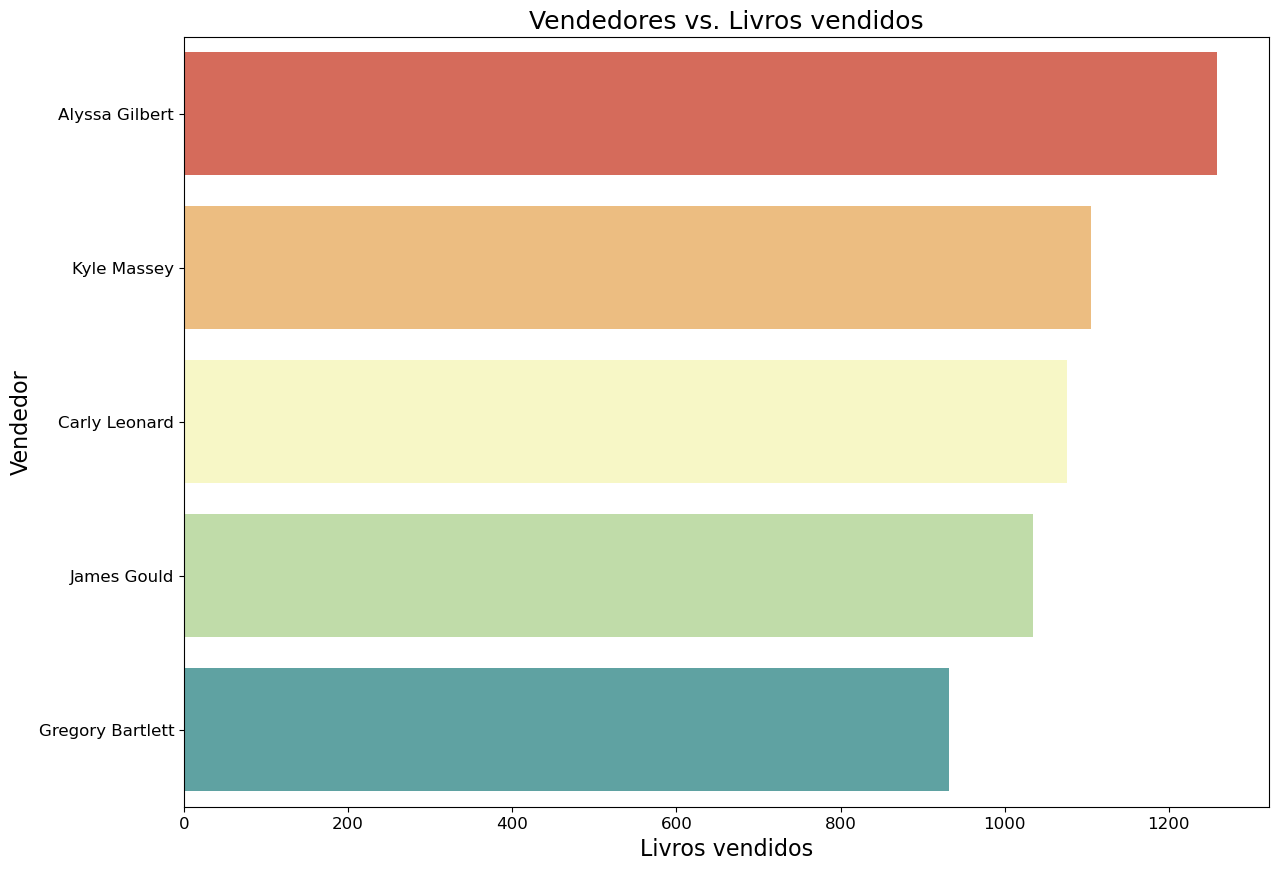

In [48]:
plt.figure(figsize=(14,10))
ax = sns.barplot(data=vendas_totais_vendedores,x="livros_vendidos",
                 y="nome_vendedor",palette=colors)
ax.axes.set_title("Vendedores vs. Livros vendidos",fontsize=18)
ax.set_xlabel("Livros vendidos",fontsize=16)
ax.set_ylabel("Vendedor",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

## 2. Livros vendidos por categoria, por cada vendedor

In [50]:
def vendor_books_sold(data):
    nomes = []
    livros_vendidos = []
    for name in data["nome_vendedor"]:
        individual_df = data[data["nome_vendedor"] == name]
        booklist = list(individual_df["nome_livro"])
        individual_df = individual_df.drop_duplicates("nome_vendedor")
        if name not in nomes:
            nomes.append(individual_df["nome_vendedor"].values[0])
            livros_vendidos.append(booklist)
    next_df = pd.DataFrame({"nome_vendedor":nomes,
                            "livros_vendidos":livros_vendidos})
    return next_df

In [51]:
livros_por_vendedor = vendor_books_sold(sales_id_multiplied)
livros_por_vendedor

,nome_vendedor,livros_vendidos
0,Carly Leonard,"[Avoid he series five., Avoid he series five.,..."
1,James Gould,"[Avoid he series five., Avoid he series five.,..."
2,Gregory Bartlett,"[Avoid he series five., Avoid he series five.,..."
3,Kyle Massey,"[Avoid he series five., Avoid he series five.,..."
4,Alyssa Gilbert,"[Avoid he series five., Avoid he series five.,..."


In [52]:
books = []
vendors = []
for i in range(0,5):
    for e in list(livros_por_vendedor["livros_vendidos"])[i]:
        vendors.append(livros_por_vendedor["nome_vendedor"][i])
        books.append(e)

books_vendors_dict = {"nome_vendedor":vendors,
                      "nome_livro":books}

books_vendors_df = pd.DataFrame(books_vendors_dict)
books_vendors_df

,nome_vendedor,nome_livro
0,Carly Leonard,Avoid he series five.
1,Carly Leonard,Avoid he series five.
2,Carly Leonard,Avoid he series five.
3,Carly Leonard,Avoid he series five.
4,Carly Leonard,Avoid he series five.
...,...,...
5401,Alyssa Gilbert,Fast century candidate amount who.
5402,Alyssa Gilbert,Fast century candidate amount who.
5403,Alyssa Gilbert,Fast century candidate amount who.
5404,Alyssa Gilbert,Fast century candidate amount who.


In [53]:
books_vendors_copy = books_vendors_df.merge(copy_books)
books_vendors_copy

,nome_vendedor,nome_livro,id_livro,id_categoria,valor_livro,nome_categoria
0,Carly Leonard,Avoid he series five.,183,2,181,Terror
1,Carly Leonard,Avoid he series five.,183,2,181,Terror
2,Carly Leonard,Avoid he series five.,183,2,181,Terror
3,Carly Leonard,Avoid he series five.,183,2,181,Terror
4,Carly Leonard,Avoid he series five.,183,2,181,Terror
...,...,...,...,...,...,...
5401,Alyssa Gilbert,Fast century candidate amount who.,15,5,341,Infantil
5402,Alyssa Gilbert,Fast century candidate amount who.,15,5,341,Infantil
5403,Alyssa Gilbert,Fast century candidate amount who.,15,5,341,Infantil
5404,Alyssa Gilbert,Fast century candidate amount who.,15,5,341,Infantil


In [54]:
def function_vendors(data,vendor_name):
    individual_df = data[data["nome_vendedor"] == vendor_name]
    idf_series = individual_df["nome_categoria"].value_counts()
    return idf_series

In [55]:
kyle = function_vendors(books_vendors_copy,"Kyle Massey")
kyle

Terror               461
Drama                260
Infantil             173
Romance              108
Ficção Científica    103
Name: nome_categoria, dtype: int64

In [56]:
alyssa = function_vendors(books_vendors_copy,"Alyssa Gilbert")
alyssa

Terror               458
Drama                335
Infantil             212
Romance              129
Ficção Científica    125
Name: nome_categoria, dtype: int64

In [57]:
james = function_vendors(books_vendors_copy,"James Gould")
james

Terror               428
Drama                195
Infantil             189
Ficção Científica    118
Romance              104
Name: nome_categoria, dtype: int64

In [58]:
greg = function_vendors(books_vendors_copy,"Gregory Bartlett")
greg

Terror               416
Drama                252
Infantil             102
Ficção Científica     83
Romance               79
Name: nome_categoria, dtype: int64

In [59]:
carly = function_vendors(books_vendors_copy,"Carly Leonard")
carly

Terror               398
Drama                267
Infantil             196
Romance              115
Ficção Científica    100
Name: nome_categoria, dtype: int64

In [60]:
vendors_cat_dict = {"nome_vendedor":["Kyle Massey","Alyssa Gilbert",
                                     "James Gould","Gregory Bartlett",
                                     "Carly Leonard","Kyle Massey",
                                     "Alyssa Gilbert","James Gould",
                                     "Gregory Bartlett","Carly Leonard",
                                     "Kyle Massey","Alyssa Gilbert",
                                     "James Gould","Gregory Bartlett",
                                     "Carly Leonard","Kyle Massey",
                                     "Alyssa Gilbert","James Gould",
                                     "Gregory Bartlett","Carly Leonard",
                                     "Kyle Massey","Alyssa Gilbert",
                                     "James Gould","Gregory Bartlett",
                                     "Carly Leonard"],
                    "nome_categoria":["Drama","Drama","Drama","Drama",
                                      "Drama","Ficção Científica",
                                     "Ficção Científica","Ficção Científica",
                                     "Ficção Científica","Ficção Científica",
                                     "Romance","Romance","Romance",
                                     "Romance","Romance","Infantil",
                                     "Infantil","Infantil","Infantil",
                                     "Infantil", "Terror","Terror",
                                     "Terror","Terror","Terror"],
                    "qtde_por_categoria":[260,335,195,252,267,103,125,118,83,100,
                                          108,129,104,79,115,173,212,189,102,196,
                                          461,458,428,416,398]}

vendors_cat_df = pd.DataFrame(vendors_cat_dict)
vendors_cat_df

,nome_vendedor,nome_categoria,qtde_por_categoria
0,Kyle Massey,Drama,260
1,Alyssa Gilbert,Drama,335
2,James Gould,Drama,195
3,Gregory Bartlett,Drama,252
4,Carly Leonard,Drama,267
5,Kyle Massey,Ficção Científica,103
6,Alyssa Gilbert,Ficção Científica,125
7,James Gould,Ficção Científica,118
8,Gregory Bartlett,Ficção Científica,83
9,Carly Leonard,Ficção Científica,100


<AxesSubplot:xlabel='nome_vendedor', ylabel='qtde_por_categoria'>

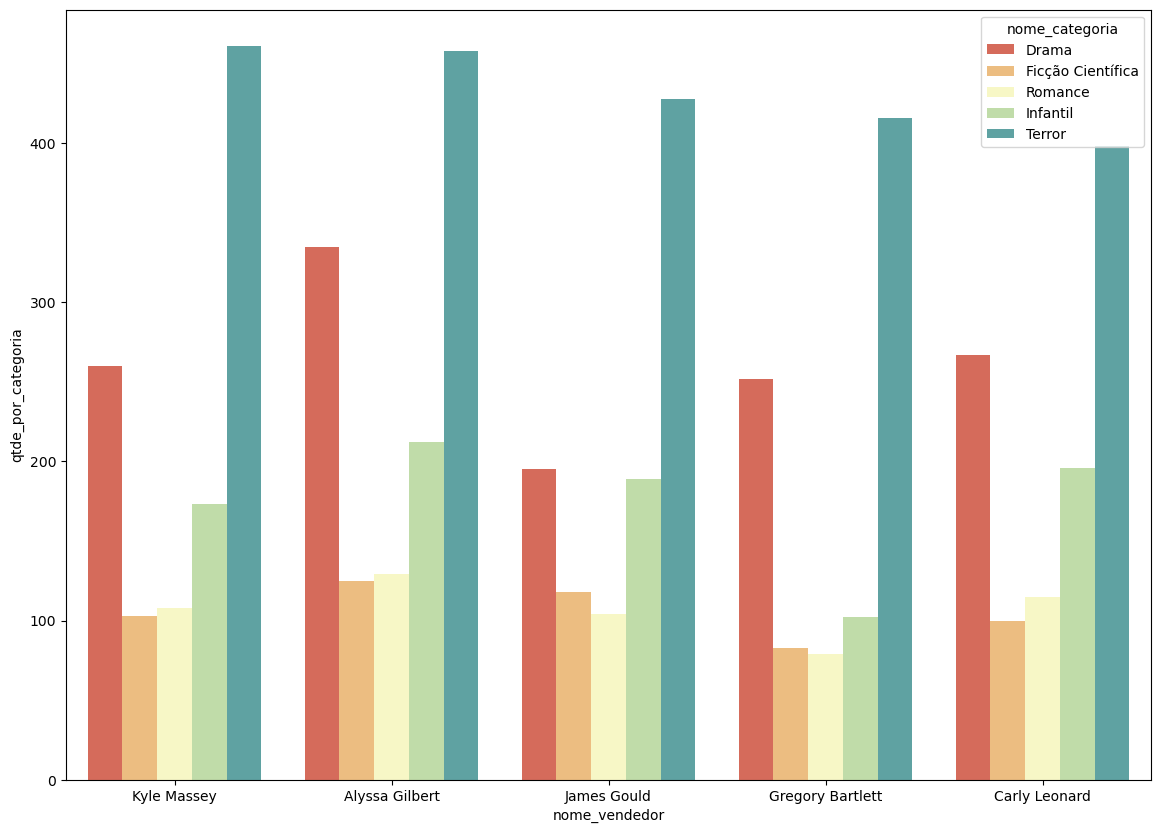

In [61]:
plt.figure(figsize=(14,10))
sns.barplot(data=vendors_cat_df,x="nome_vendedor",y="qtde_por_categoria",
            hue="nome_categoria",palette=colors)

## 3. Clientes atendidos por vendedor

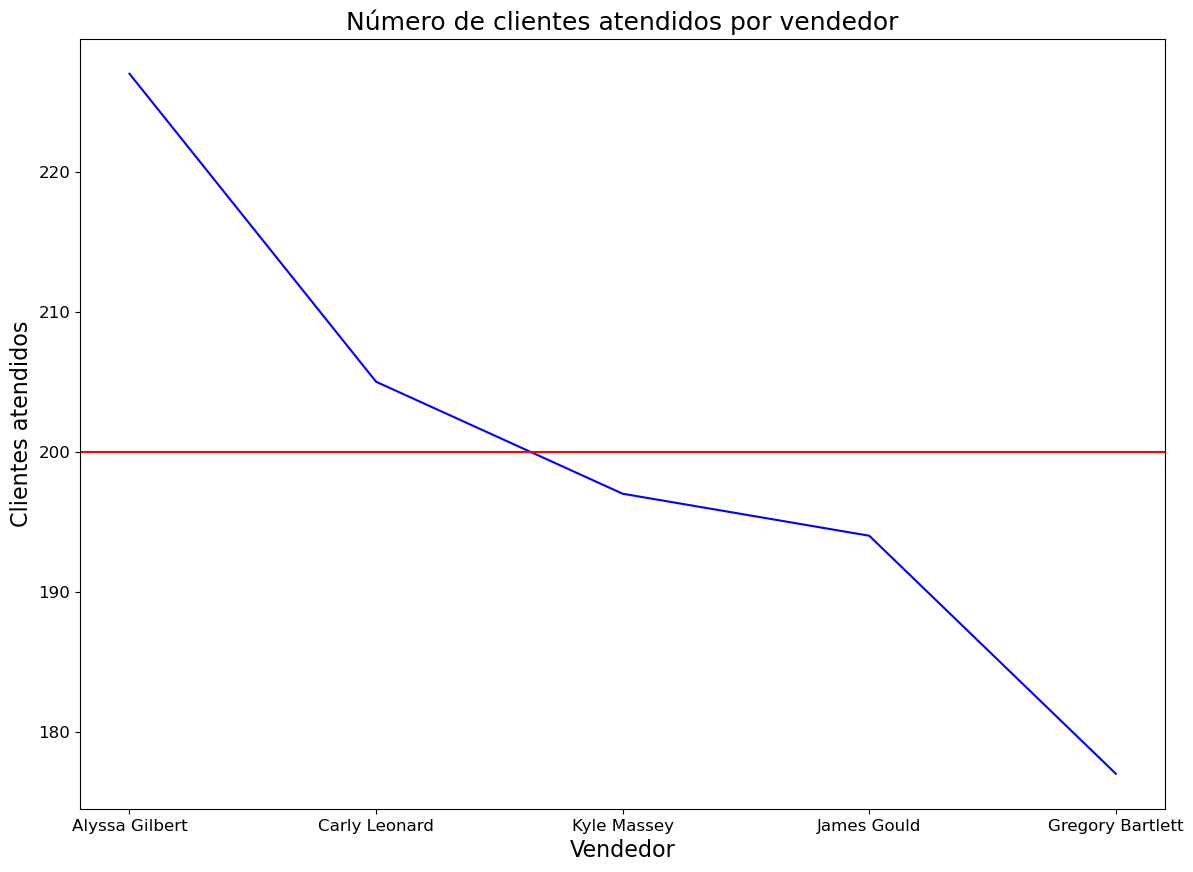

In [62]:
plt.figure(figsize=(14,10))
ax = sns.lineplot(data=qtde_clientes_por_vendedor,x="nome_vendedor",
                  y="n_clientes_atendidos",color="blue")
ax.axes.set_title("Número de clientes atendidos por vendedor",fontsize=18)
ax.set_xlabel("Vendedor",fontsize=16)
ax.set_ylabel("Clientes atendidos",fontsize=16)
ax.tick_params(labelsize=12)
ax.axhline(y=200.0,color="red")
plt.show()

## 4. Distribuição da quantidade de livros por cliente

In [63]:
def clients_n_books(data):
    nomes = []
    qtde_compras = []
    for name in data["nome_cliente"]:
        individual_df = data[data["nome_cliente"] == name]
        n_sales = sum(individual_df["quantidade_livro"])
        individual_df = individual_df.drop_duplicates("nome_cliente")
        if name not in nomes:
            nomes.append(individual_df["nome_cliente"].values[0])
            qtde_compras.append(n_sales)
    next_df = pd.DataFrame({"nome_cliente":nomes,
                            "livros_comprados":qtde_compras})
    new_df = next_df.sort_values(by="livros_comprados",ignore_index=True,
                                 ascending=False)
    return new_df

In [64]:
qtde_livros_por_cliente = clients_n_books(sales_id_multiplied)
qtde_livros_por_cliente

,nome_cliente,livros_comprados
0,Robin Rodriguez,465
1,Austin Cobb,460
2,Mr. Paul Duran,409
3,Chad Hughes,401
4,Beverly Bass,399
...,...,...
240,Stephen Stone,4
241,Richard Sanford,4
242,Briana Hurst,4
243,Andrew Dixon,4


<AxesSubplot:ylabel='Density'>

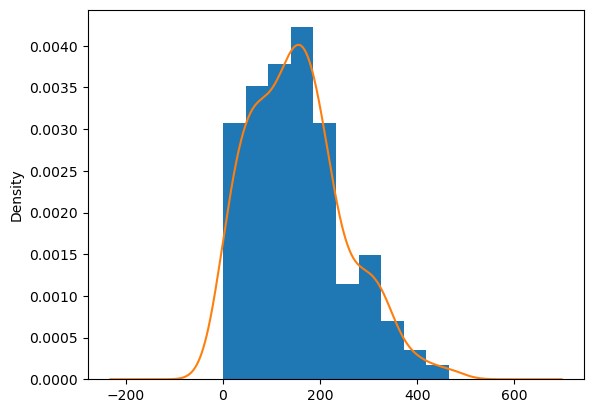

In [84]:
qtde_livros_por_cliente["livros_comprados"].hist(density=True)
qtde_livros_por_cliente["livros_comprados"].plot.kde()

## 5. Gráfico da quantidade de livros por categoria

In [85]:
livros_por_categoria

,nome_categoria,quantidade_livros
0,Terror,18
1,Drama,13
2,Infantil,9
3,Ficção Científica,5
4,Romance,5


In [88]:
livros_por_categoria.mean(numeric_only=True)

quantidade_livros    10.0
dtype: float64

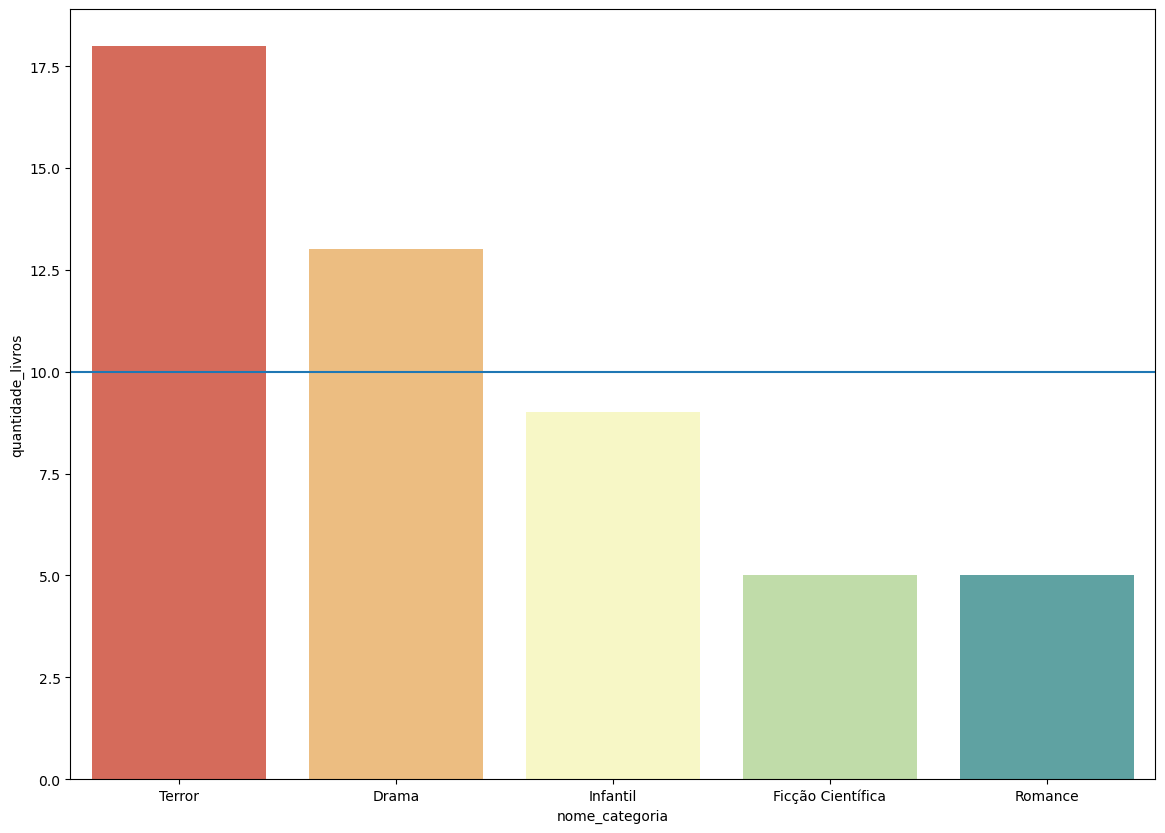

In [94]:
plt.figure(figsize=(14,10))
ax = sns.barplot(data=livros_por_categoria,x="nome_categoria",y="quantidade_livros",
                 palette=colors)
ax.axhline(y=10.0)
plt.show()

# 2. Atividade bônus

Faça o download de algum banco de dado de seu interesse no Kagle e faça uma análise descrivita de informações, além de plots, do que julgar relevante apresentar sobre o banco de dados escolhido.

In [ ]:
# Células de código